# CHRONIC KIDNEY CLASSIFICATION 

# Import Libraries

In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# Load Data 

In [6]:
df = pd.read_csv('kidney_disease_dataset.csv')
df.head()

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
0,71,0.30,40.9,0,1,46.8,1622.0,1,0
1,34,1.79,17.1,0,0,43.8,1428.0,1,0
2,80,2.67,15.0,0,1,78.2,1015.0,1,0
3,40,0.97,31.1,0,1,92.8,1276.0,1,0
4,43,2.05,22.8,1,1,62.2,1154.0,0,0


# Data Analysis 


In [7]:
df.shape

(2304, 9)

In [8]:
df.dtypes

Age                   int64
Creatinine_Level    float64
BUN                 float64
Diabetes              int64
Hypertension          int64
GFR                 float64
Urine_Output        float64
CKD_Status            int64
Dialysis_Needed       int64
dtype: object

In [9]:
df.isnull().sum()

Age                 0
Creatinine_Level    0
BUN                 0
Diabetes            0
Hypertension        0
GFR                 0
Urine_Output        0
CKD_Status          0
Dialysis_Needed     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2304 non-null   int64  
 1   Creatinine_Level  2304 non-null   float64
 2   BUN               2304 non-null   float64
 3   Diabetes          2304 non-null   int64  
 4   Hypertension      2304 non-null   int64  
 5   GFR               2304 non-null   float64
 6   Urine_Output      2304 non-null   float64
 7   CKD_Status        2304 non-null   int64  
 8   Dialysis_Needed   2304 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 162.1 KB


In [11]:
df.describe()

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
count,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000
mean,54.159288,1.305638,18.813672,0.406684,0.498264,68.953863,1309.189670,0.508681,0.013455
std,20.513729,0.789594,10.508358,0.491322,0.500106,24.660191,491.951914,0.500033,0.115237
min,20.000000,0.300000,5.000000,0.000000,0.000000,5.000000,100.000000,0.000000,0.000000
25%,36.000000,0.620000,9.975000,0.000000,0.000000,51.300000,967.750000,0.000000,0.000000
50%,54.000000,1.240000,18.200000,0.000000,0.000000,69.150000,1295.500000,1.000000,0.000000
75%,72.000000,1.842500,26.000000,1.000000,1.000000,86.300000,1633.500000,1.000000,0.000000
max,90.000000,4.130000,61.900000,1.000000,1.000000,120.000000,2899.000000,1.000000,1.000000


In [12]:
df.columns

Index(['Age', 'Creatinine_Level', 'BUN', 'Diabetes', 'Hypertension', 'GFR',
       'Urine_Output', 'CKD_Status', 'Dialysis_Needed'],
      dtype='object')

In [13]:
df.head()

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
0,71,0.30,40.9,0,1,46.8,1622.0,1,0
1,34,1.79,17.1,0,0,43.8,1428.0,1,0
2,80,2.67,15.0,0,1,78.2,1015.0,1,0
3,40,0.97,31.1,0,1,92.8,1276.0,1,0
4,43,2.05,22.8,1,1,62.2,1154.0,0,0


# Splitting 

In [14]:
X = df.drop("Dialysis_Needed",axis=1)
y = df["Dialysis_Needed"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling 

In [16]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Implementation 

In [17]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

# Evaluation

**METRICS**

In [18]:
print("📌 Accuracy:", accuracy_score(y_test, y_pred))
print("📌 Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("📌 Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("📌 F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))

📌 Accuracy: 1.0
📌 Precision (macro): 1.0
📌 Recall (macro): 1.0
📌 F1 Score (macro): 1.0

📌 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       455
           1       1.00      1.00      1.00         6

    accuracy                           1.00       461
   macro avg       1.00      1.00      1.00       461
weighted avg       1.00      1.00      1.00       461



**CONFUSION MATRIX**

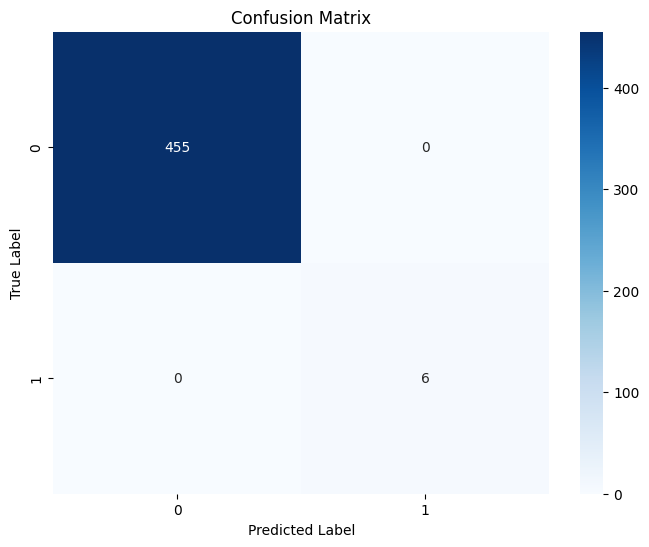

In [19]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**ROC CURVE**

📌 ROC AUC Score: 1.0


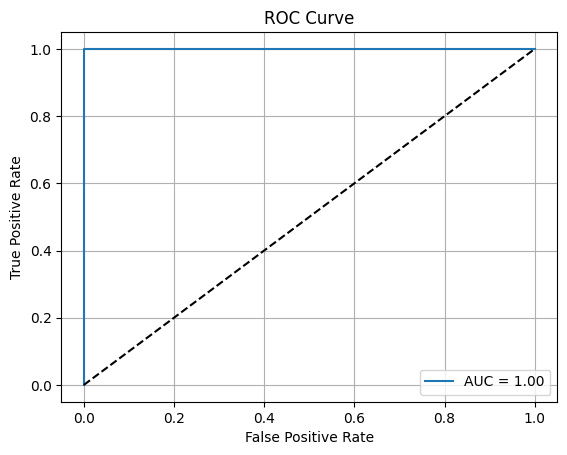

In [20]:
y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
print("📌 ROC AUC Score:", auc)
    
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()  